___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br><br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [81]:
# import tensorflow as tf
# tf.config.list_physical_devices("GPU")

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [82]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [83]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [84]:
X_train[5].shape

(28, 28)

In [85]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [86]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

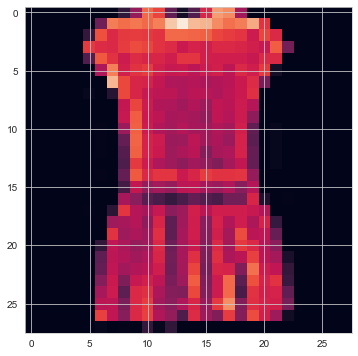

In [87]:
plt.imshow(X_train[3])

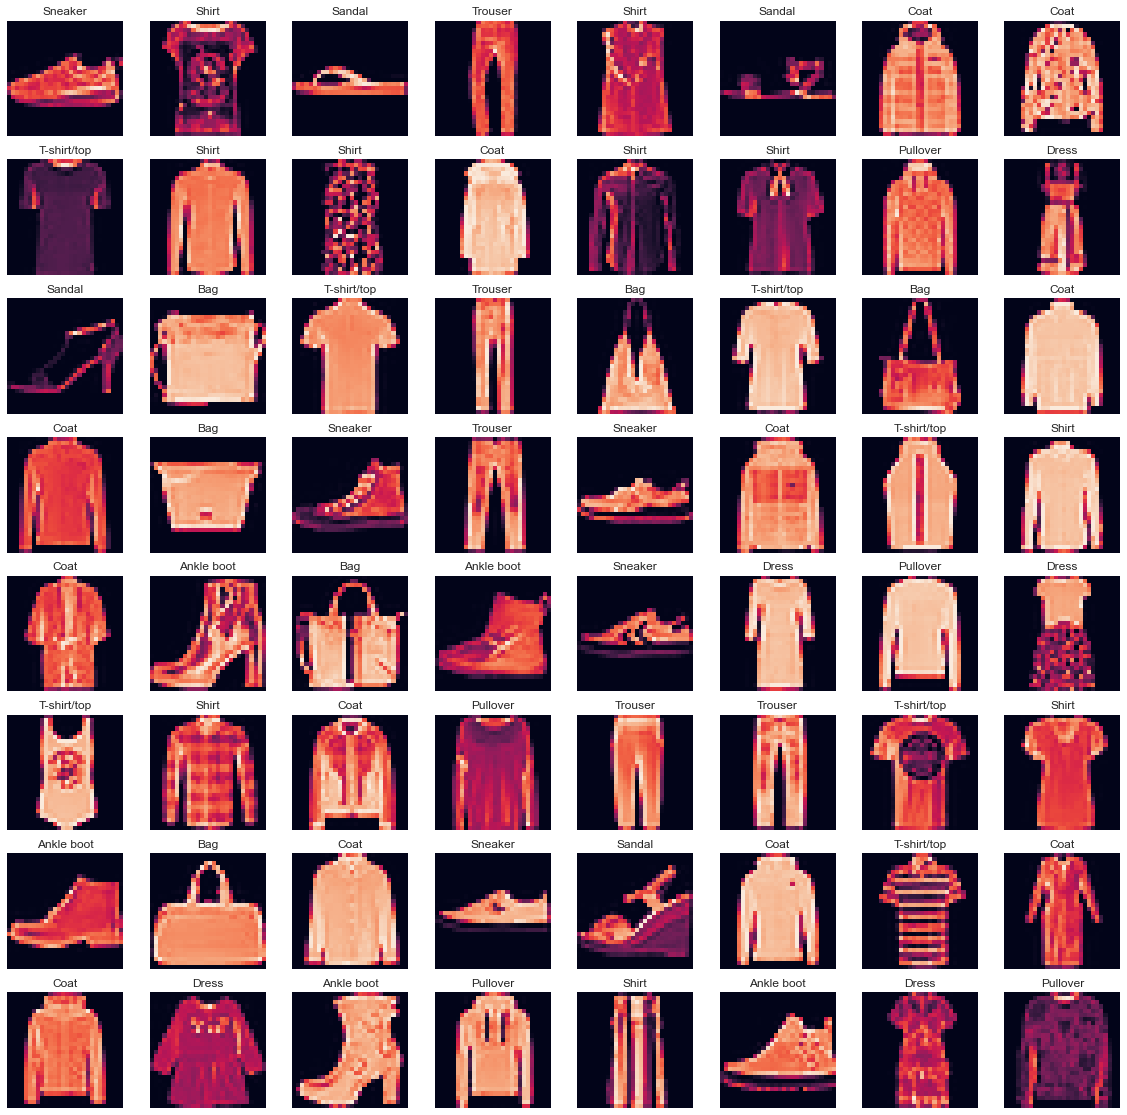

In [88]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [89]:
X_train[5].min()

0

In [90]:
X_train[5].max()

255

In [91]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [92]:
X_train[5].min()

0.0

In [93]:
X_train[5].max()

1.0

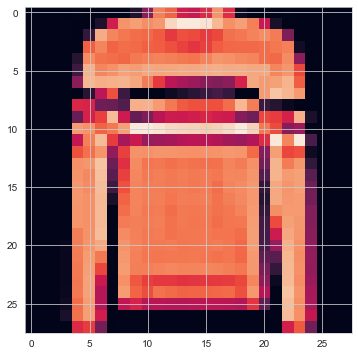

In [94]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [95]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [96]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [97]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [98]:
from tensorflow.keras.utils import to_categorical

In [99]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [100]:
y_train[9]

5

In [101]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [103]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        8096      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [107]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4388 - accuracy: 0.8405 - val_loss: 0.3639 - val_accuracy: 0.8704
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2850 - accuracy: 0.8961 - val_loss: 0.3008 - val_accuracy: 0.8887
Epoch 3/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2394 - accuracy: 0.9119 - val_loss: 0.2621 - val_accuracy: 0.9049
Epoch 4/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2090 - accuracy: 0.9229 - val_loss: 0.2593 - val_accuracy: 0.9055
Epoch 5/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1861 - accuracy: 0.9298 - val_loss: 0.2540 - val_accuracy: 0.9071
Epoch 6/50
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1645 - accuracy: 0.9377 - val_loss: 0.2466 - val_accuracy: 0.9134
Epoch 7/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1454 - accuracy: 0.9444 - val_loss: 0.2587 -

In [108]:
model.metrics_names

['loss', 'accuracy']

**TASK 7: Plot values of metrics you used in your model.**

In [109]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.439,0.840,0.364,0.870
1,0.285,0.896,0.301,0.889
2,0.239,0.912,0.262,0.905
3,0.209,0.923,0.259,0.905
4,0.186,0.930,0.254,0.907


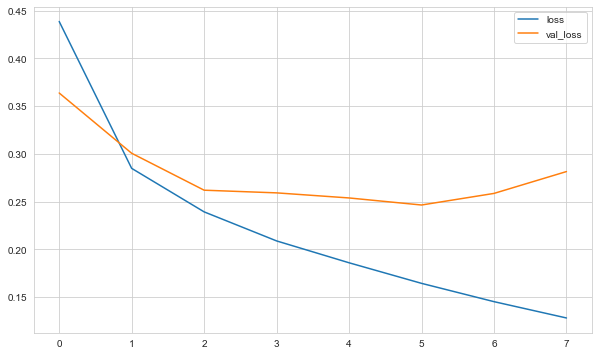

In [110]:
summary[["loss", "val_loss"]].plot();

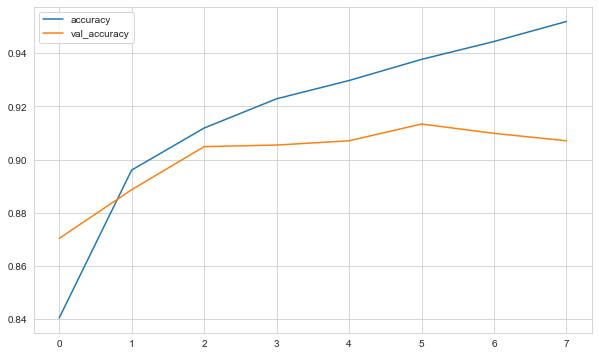

In [111]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2465774118900299
Test accuracy: 0.9133999943733215


In [114]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [115]:
y_pred = np.argmax(pred_prob, axis=1)

In [116]:
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.87      0.87      1000
           3       0.91      0.92      0.91      1000
           4       0.81      0.92      0.86      1000
           5       0.99      0.96      0.98      1000
           6       0.84      0.64      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [118]:
print(confusion_matrix(y_test, y_pred)) 

[[903   0   7  17   2   0  61   0  10   0]
 [  1 979   1  13   3   0   2   0   1   0]
 [ 25   1 867  10  63   0  32   0   2   0]
 [ 24   1   9 922  34   0   8   0   2   0]
 [  1   0  42  17 924   0  15   0   1   0]
 [  0   0   0   0   0 961   0  29   0  10]
 [142   2  57  33 115   0 643   0   8   0]
 [  0   0   0   0   0   1   0 978   0  21]
 [  3   0   0   6   0   1   0   3 987   0]
 [  1   0   0   0   0   4   0  25   0 970]]


<AxesSubplot:>

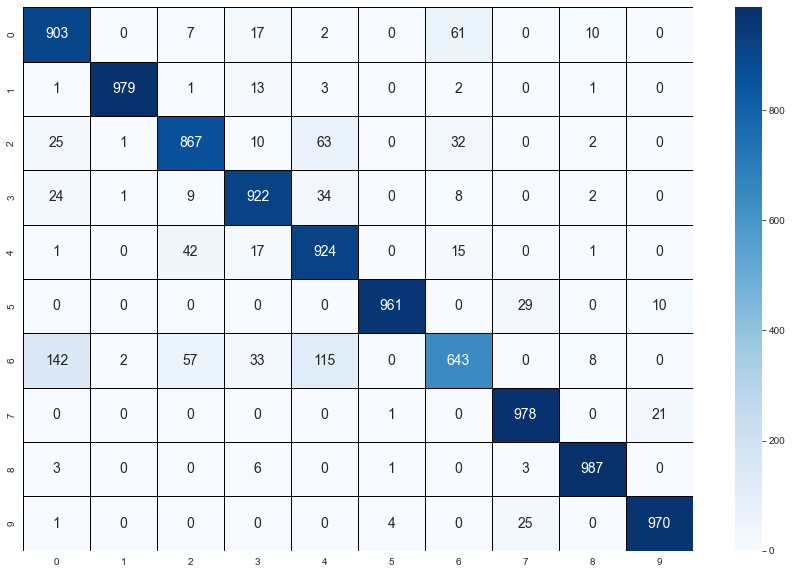

In [119]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [125]:
my_number = X_test[4]

In [126]:
my_number.shape

(28, 28, 1)

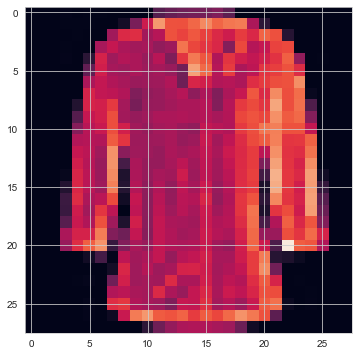

In [127]:
plt.imshow(my_number.reshape(28,28));

In [128]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 17ms/step


array([[2.6569560e-01, 1.2227729e-05, 1.1020948e-02, 2.4946448e-03,
        5.7457653e-03, 7.0951631e-07, 7.1501988e-01, 2.3619100e-08,
        9.2232958e-06, 1.0342233e-06]], dtype=float32)

In [129]:
y_pred = np.argmax(pred_prob)
y_pred

6

In [134]:
classes[y_pred]

'Shirt'